<a href="https://colab.research.google.com/github/Ainmimdal/DSA/blob/main/Runtime_Maze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

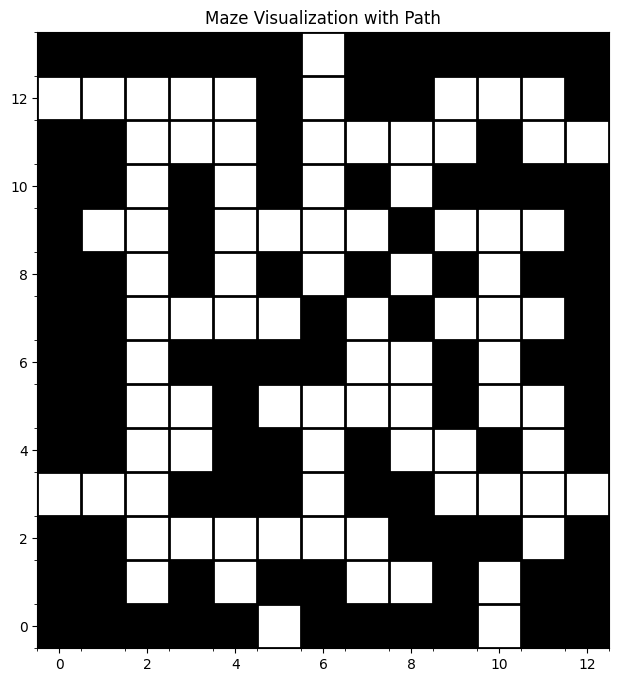

KeyboardInterrupt: Interrupted by user

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from collections import deque

# Directions for moving up, down, left, right
directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

def is_valid_move(maze, x, y, visited):
    """Check if the move is within bounds and not a wall or visited."""
    rows, cols = len(maze), len(maze[0])
    return 0 <= x < rows and 0 <= y < cols and maze[x][y] == 0 and (x, y) not in visited

def find_exits(maze):
    """Find all possible exits in the maze (border open spaces)."""
    exits = []
    rows, cols = len(maze), len(maze[0])

    # Check top and bottom rows
    for col in range(cols):
        if maze[0][col] == 0:  # Top row
            exits.append((0, col))
        if maze[rows-1][col] == 0:  # Bottom row
            exits.append((rows-1, col))

    # Check left and right columns
    for row in range(rows):
        if maze[row][0] == 0:  # Left column
            exits.append((row, 0))
        if maze[row][cols-1] == 0:  # Right column
            exits.append((row, cols-1))

    return exits

def bfs(maze, start, end):
    """Find the shortest path using BFS."""
    rows, cols = len(maze), len(maze[0])

    # Queue for BFS and visited set
    queue = deque([(start, [start])])  # Store (current_position, path_to_here)
    visited = set()
    visited.add(start)

    while queue:
        (x, y), path = queue.popleft()

        # If the target is reached, return the path
        if (x, y) == end:
            return path

        # Explore all four possible directions
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if is_valid_move(maze, nx, ny, visited):
                visited.add((nx, ny))
                queue.append(((nx, ny), path + [(nx, ny)]))

    return None  # No path found

def visualize_maze(maze, path=None):
    """Visualize the maze with the path (if found)."""
    maze_array = np.array(maze)
    fig, ax = plt.subplots(figsize=(8, 8))

    # Plot the maze
    ax.imshow(maze_array, cmap='binary', interpolation='nearest')

    # If a path is found, plot the path
    if path:
        path_x, path_y = zip(*path)  # Separate x and y coordinates
        ax.plot(path_y, path_x, color='red', linewidth=2, marker='o', markersize=5)

    # Add grid
    ax.set_xticks(np.arange(-0.5, maze_array.shape[1], 1), minor=True)
    ax.set_yticks(np.arange(-0.5, maze_array.shape[0], 1), minor=True)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)

    ax.set_title("Maze Visualization with Path")
    plt.gca().invert_yaxis()  # To match the row/column convention of maze
    plt.show(block=False)

# Example maze (0: open path, 1: wall) for a 13x13 grid
maze = [
    [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1],
    [1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1],
    [1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1],
    [0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0],
    [1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1],
    [1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1],
    [1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1],
    [1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1],
    [1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1],
    [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1],
    [1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1],
    [1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
]
visualize_maze(maze)
# Prompt the user for the starting and ending points
start_row = int(input("Enter the start row (0-12): "))
start_col = int(input("Enter the start column (0-12): "))
end_row = int(input("Enter the end row (0-12): "))
end_col = int(input("Enter the end column (0-12): "))

start = (start_row, start_col)  # Start position (row, col)
end = (end_row, end_col)        # End position (row, col)

# Ensure start and end points are valid (0 is an open path)
if maze[start_row][start_col] == 1 or maze[end_row][end_col] == 1:
    print("Invalid start or end point. They must be on open paths (0).")
else:
    # Find the shortest path
    path = bfs(maze, start, end)

    if path:
        print("Path found:", path)
    else:
        print("No path found.")

    # Visualize the maze and path
    visualize_maze(maze, path)